In [1]:
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')
# mnist

In [2]:
from scipy.io import loadmat
mnist_path = "./mnist-original.mat"
mnist_raw = loadmat(mnist_path)
mnist = {
    "data" : mnist_raw["data"].T,
    "target":mnist_raw["label"][0],
    "COL_NAMES":["label","data"],
    "DESCR":"mldata.org dataset:mnist-original",
}
print("success")

success


In [3]:
X,y = mnist['data'],mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


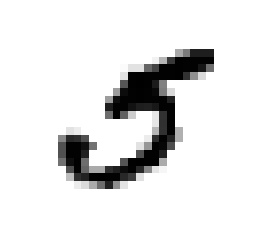

5.0


In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis('off')
plt.show()
print(y[36000])

In [5]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [6]:
y_train

array([0., 0., 0., ..., 9., 9., 9.])

#### now we have to shuffle the training set, to guarantee that the algo wont perform poorly (it will perform poorly if it gets similar instances)

In [7]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index],y_train[shuffle_index]

## TRAINING A BINARY CLASSIFIER

#### for now we are only trying to identify if it is either 5 or not 5

In [8]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

#### we use Stochastic gradient classifier as it has the advantage of handling very large datasets efficiently

In [9]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train_5)

C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [10]:
sgd_clf.predict([some_digit])

array([ True])

### if needed you can implement your own cross validation code also.

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\visha\Anaconda3\lib\sit

array([0.96025, 0.9486 , 0.95175])

#### this model has such a high accuracy because only about 10% of the images are 5's.  hence this is why accuracy is not the preferred performance measure for classifiers, especially if u r dealing with skewed datasets(some classes are more freq than others).

### CONFUSION MATRIX : much better way to evaluate a classifier. for example, the number of times the classifier confused image of 5 with 3 will be stored in (5,3) of the matrix

In [12]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\visha\Anaconda3\lib\sit

In [13]:
y_train_pred.shape

(60000,)

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[54385,   194],
       [ 2594,  2827]], dtype=int64)

#### here 53287 where correctly classified as non 5's(true negative), 1292 were wrongly classified as 5's(false positives). 1002 were wrongly classified as non5's (false negatives), 4419 were classified correctly as 5's(true positives).

## Precision, Recall (true positive rate ,sensitivity),F1 score

In [15]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5,y_train_pred))
print(recall_score(y_train_5,y_train_pred))

0.9357828533598146
0.5214904999077661


#### The above values mean that when it claims an image represents a 5, it is correct only 65% of the time. Moreover, it only detects 79% of the 5s.

#### f1 score is the harmonic mean of precision and recall. this means that harmonic mean will give more weights to low values. so it will give a high f1 score if both recall and precision is high.

In [16]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.669746505567401

## precision recall trade off (decision function, choosing the threshold value)

In [17]:
y_score = sgd_clf.decision_function([some_digit])
y_score

array([193429.50786056])

In [18]:
threshold = 0
y_some_digit_pred = (y_score>threshold)
y_some_digit_pred

array([ True])

#### hence there is a need to choose a proper threshold value. the following way is shown on how to choose a proper threshold value

#### Decision function : Predict confidence scores for samples.The confidence score for a sample is the signed distance of that sample to the hyperplane.

In [19]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\visha\Anaconda3\lib\sit

In [20]:
from sklearn.metrics import precision_recall_curve
precision,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

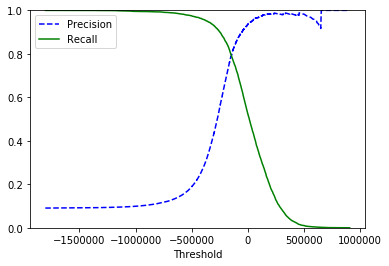

In [21]:
def plot_precision_recall_vs_threshold(precision,recalls,thresholds):
    plt.plot(thresholds, precision[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precision,recalls,thresholds)
plt.show()

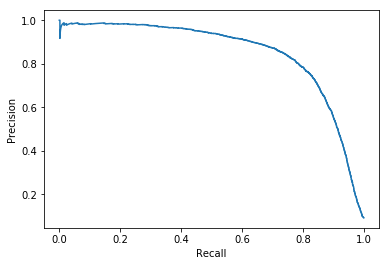

In [22]:
plt.plot(recalls,precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


In [23]:
y_train_pred_90 = (y_scores>70000)
print(precision_score(y_train_5,y_train_pred_90))
print(recall_score(y_train_5,y_train_pred_90))


0.9637023593466425
0.39180962921970114


#### a high precision classifier is not very useful if it's recall is too low

## ROC curves

#### recall - sensitivity, true negative rate - specificity

In [24]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

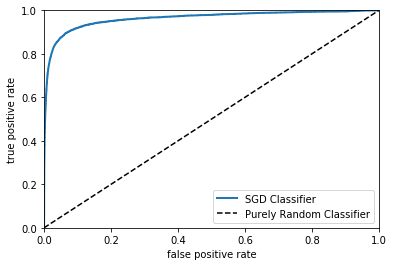

In [25]:
plt.plot(fpr,tpr,linewidth=2,label="SGD Classifier")
plt.plot([0,1],[0,1],'k--',label="Purely Random Classifier")
plt.axis([0,1,0,1])
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

#### The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner). once again there is a tradeoff, the higher the recall (tpr) the more false positives (fpr) the classifier produces.

#### one way to compare classifiers is to meaure AUC (area under curve). perfect classifier will have ROC AUC equal to 1, whereas purely random classifier will have ROC AUC = 0.5.

In [26]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.962974374399909

## Random forest classifier

#### random forest classifier does not have a decision function, instead it has a predict proba function which returns an array containing a row per instance and a column per class, each containing the probability that the given instance belongs to the given class (e.g., 70% chance that the image represents a 5)

In [27]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

#### but to plot ROC curves u need scores and not probabilities

In [28]:
y_scores_forest = y_probas_forest[:,1] #?????
fpr_forest,tpr_forest,threshold_forest = roc_curve(y_train_5,y_scores_forest)

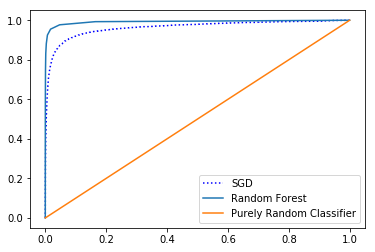

In [29]:
plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot(fpr_forest, tpr_forest, label="Random Forest")
plt.plot([0,1],[0,1],label="Purely Random Classifier")
plt.legend(loc="lower right")
plt.show()

In [30]:
roc_auc_score(y_train_5,y_scores_forest)

0.9925174422698374

In [31]:
y_train_pred_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3)
print(precision_score(y_train_5,y_train_pred_forest))
print(recall_score(y_train_5,y_train_pred_forest))

0.9817073170731707
0.831580889134846


## Multiclass classification

#### sgd automatically run one vs all for this.

In [32]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([5.])

In [33]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -20643.39798337, -471586.74139863, -300815.20454991,
        -264455.4979926 , -480795.91428856,  193429.50786056,
        -677004.91086053, -485180.83682397, -581833.40378944,
        -643590.17980865]])

#### hence the max is actually the 5th index.

In [34]:
np.argmax(some_digit_scores)

5

In [35]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [36]:
sgd_clf.classes_[5]

5.0

In [37]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\visha\Anaconda3\lib\sit

array([0.86132773, 0.85899295, 0.85897885])

#### scaling the inputs

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\visha\Anaconda3\lib\sit

array([0.90976805, 0.90909545, 0.9099865 ])

## Error Analysis

In [39]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\visha\Anaconda3\lib\sit

array([[5722,    3,   27,   11,   13,   53,   45,    8,   36,    5],
       [   1, 6475,   48,   27,    6,   36,    6,   10,  122,   11],
       [  53,   39, 5348,   95,   81,   24,   90,   58,  154,   16],
       [  52,   41,  142, 5330,    2,  224,   38,   60,  141,  101],
       [  17,   27,   34,    6, 5382,    9,   54,   33,   86,  194],
       [  75,   45,   40,  181,   69, 4591,  111,   31,  185,   93],
       [  34,   28,   48,    2,   51,   95, 5601,    7,   51,    1],
       [  25,   23,   63,   20,   53,    7,    6, 5807,   17,  244],
       [  55,  154,   67,  158,   15,  134,   59,   27, 5047,  135],
       [  44,   30,   26,   86,  175,   32,    2,  199,   81, 5274]],
      dtype=int64)

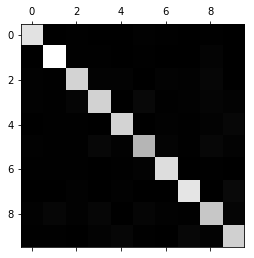

In [40]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

#### to compute the errors first u need to normalize the confusion matrix

In [41]:
row_sums = conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mx/row_sums

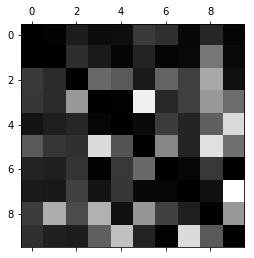

In [42]:
# we fill diagonal with zeros to keep only the errors
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

#### we see that we can improve classifications of 8 and 9 a lot. we can probably reduce this by applying some image processing techniques or by gathering some more data